## Introduction
In the previous mission, we learned some basic techniques and principles for making our plots more aesthetic. In this mission, we'll focus more directly on customizing colors, line widths, layout, and annotations to improve the ability for a viewer to extract insights from the charts. We'll continue to use the same data set containing the percentage of bachelor's degrees granted to women from 1970 to 2012

We've gone ahead and read the data set into a DataFrame named women_degrees. We've also brought over the code we wrote at the end of the previous mission to generate line charts for four STEM degree categories. 

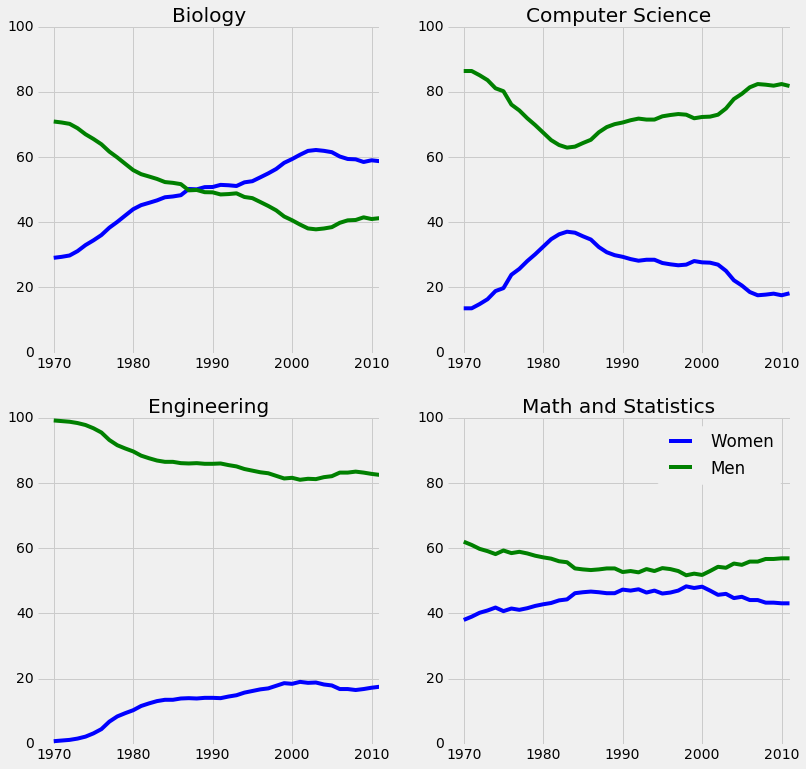

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
major_cats = ['Biology', 'Computer Science', 'Engineering', 'Math and Statistics']

fig = plt.figure(figsize=(12, 12))

for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], c='blue', label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[sp]], c='green', label='Men')
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(major_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")

plt.legend(loc='upper right')
plt.show()

## Color
So far, we've been using the default matplotlib colors to color the lines in line charts. When selecting colors, we need to be mindful of people who have some amount of color blindness. People who have color blindness have a decreased ability to distinguish between certain kinds of colors. The most common form of color blindness is red-green color blindness, where the person can't distinguish between red and green shades. Approximately 8% of men and 0.5% of women of Northern European descent suffer from red-green color blindness.

If we wanted to publish the data visualizations we create, we need to be mindful of color blindness. Thankfully, there are color palettes we can use that are friendly for people with color blindness. One of them is called Color Blind 10 and was released by Tableau, the company that makes the data visualization platform of the same name. 

## Setting Line Color Using RGB
The Color Blind 10 palette contains ten colors that are colorblind friendly.


The RGB color model describes how the three primary colors (red, green, and blue) can be combined in different proportions to form any secondary color. The RGB color model is very familiar to people who work in photography, filmography, graphic design, and any field that use colors extensively. In computers, each RGB value can range between 0 and 255. This is because 256 integer values can be represented using 8 bits. The first color in the palette is a color that resembles dark blue and has the following RGB values:

- Red: 0
- Blue: 107
- Green: 164

To specify a line color using RGB values, we pass in a tuple of the values to the c parameter when we generate the line chart. Matplotlib expects each value to be scaled down and to range between 0 and 1 (not 0 and 255).  

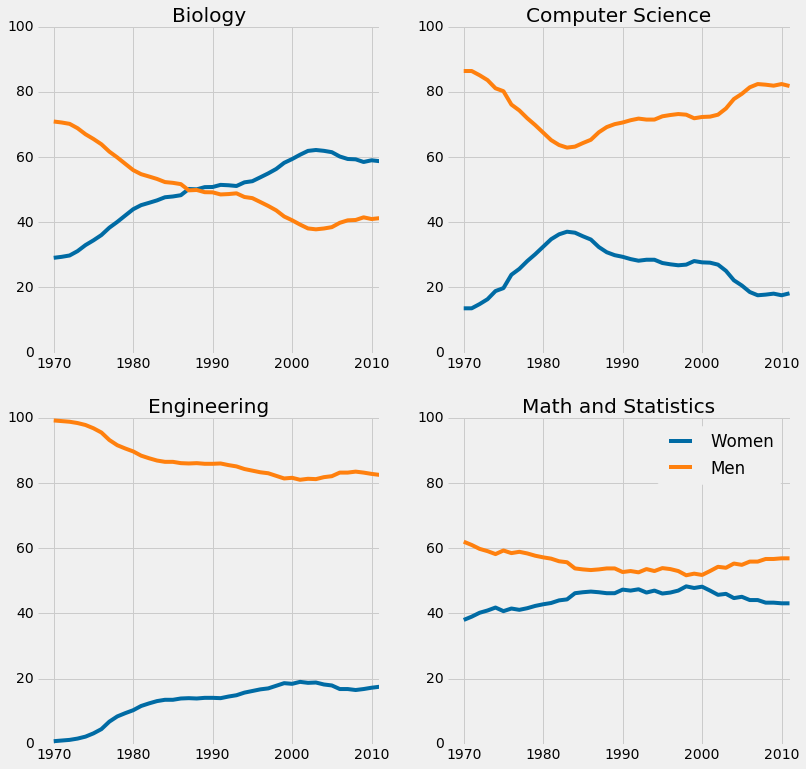

In [3]:
fig = plt.figure(figsize=(12, 12))

for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)
    # The color for each line is assigned here.
    cb_dark_blue=(0/255,107/255,164/255)
    cb_orange=(255/255, 128/255, 14/255)
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], c=cb_dark_blue, label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[sp]], c=cb_orange, label='Men')
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(major_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")

plt.legend(loc='upper right')
plt.show()

## Setting Line Width
By default, the actual lines reflecting the underlying data in the line charts we've been generating are quite thin. The white color in the blank area in the line charts is still a dominating color. To emphasize the lines in the plots, we can increase the width of each line. Increasing the line width also improves the data-ink ratio a little bit, because more of the chart area is used to showcase the data.

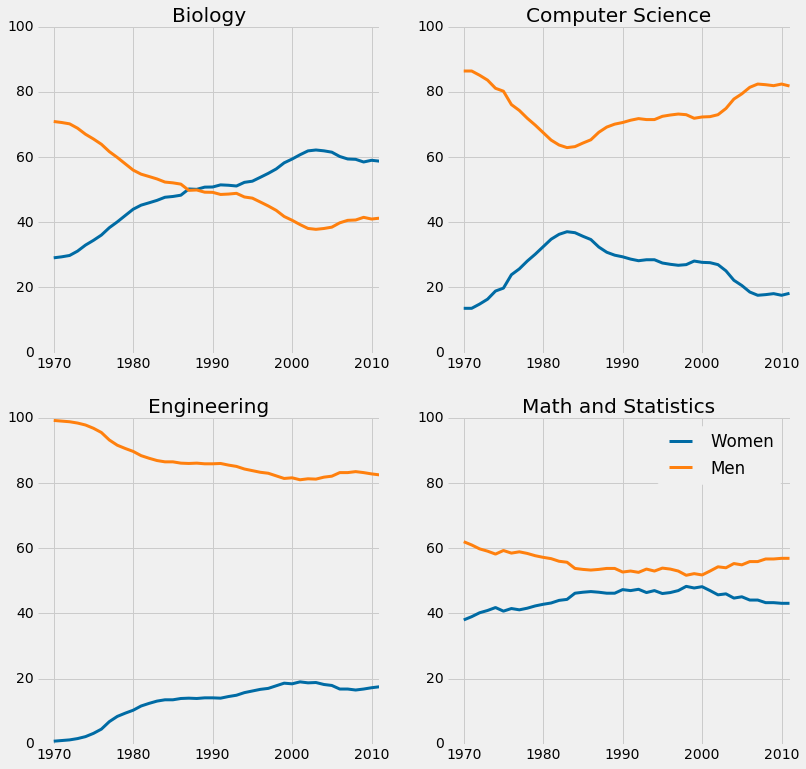

In [4]:
# We change the linewidth even if with the fivethirtyeight style we get pretty clear lines

cb_dark_blue = (0/255, 107/255, 164/255)
cb_orange = (255/255, 128/255, 14/255)

fig = plt.figure(figsize=(12, 12))

for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)
    # Set the line width when specifying how each line should look.
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(major_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")

plt.legend(loc='upper right')
plt.show()

## Improve The Layout And Ordering
So far, we've been generating our line charts on a 2 by 2 subplot grid. If we wanted to visualize all six STEM degrees, we'd need to either add a new column or a new row. Unfortunately, neither solution orders the plots in a beneficial way to the viewer. By scanning horizontally or vertically, a viewer isn't able to learn any new information and this can cause some frustration as the viewer's gaze jumps around the image.

To make the viewing experience more coherent, we can:

- use layout of a single row with multiple columns
- order the plots in decreasing order of initial gender gap

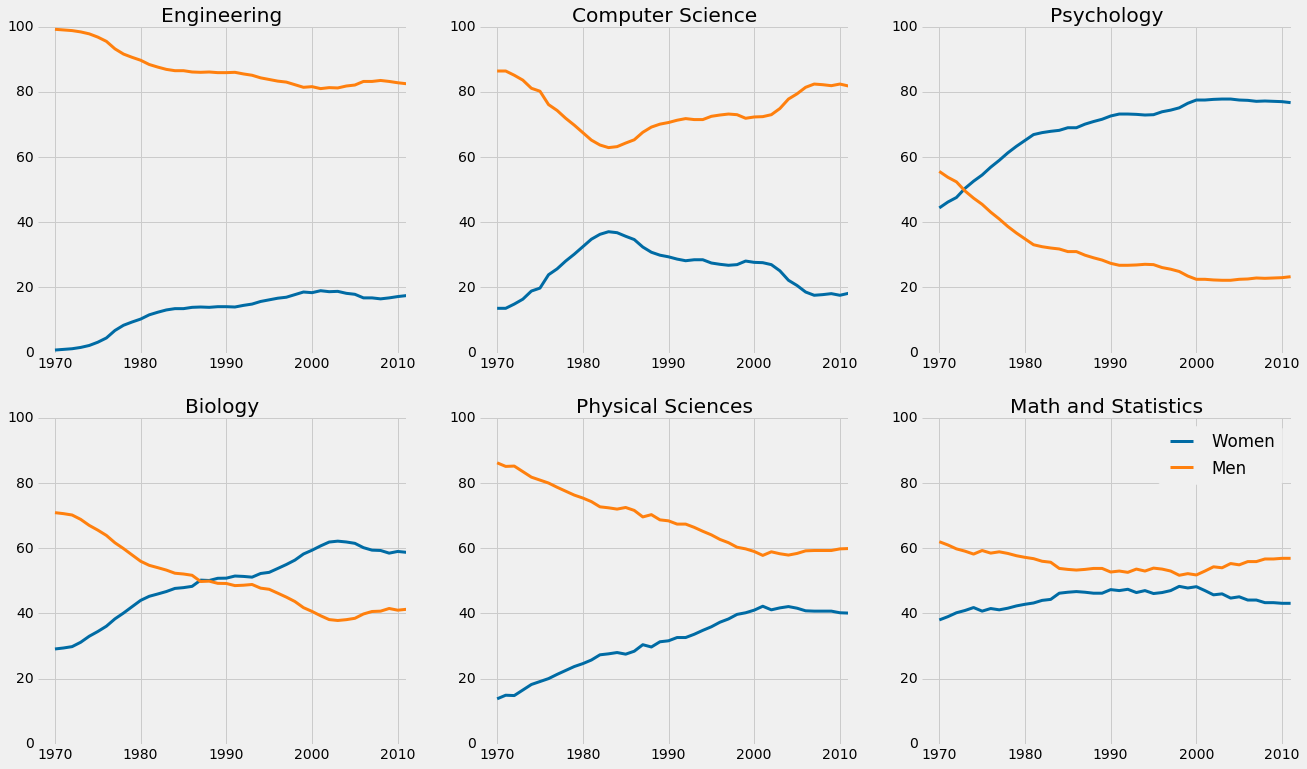

In [5]:
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

fig = plt.figure(figsize=(20, 12))

for sp in range(0,6):
    ax = fig.add_subplot(2,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")

plt.legend(loc='upper right')
plt.show()

## Replacing The Legend With Annotations
The purpose of a legend is to ascribe meaning to symbols or colors in a chart. We're using it to inform the viewer of what gender corresponds to each color. Tufte encourages removing legends entirely if the same information can be conveyed in a cleaner way. Legends consist of non-data ink and take up precious space that could be used for the visualizations themselves (data-ink).

## Annotating In Matplotlib
To add text annotations to a matplotlib plot, we use the Axes.text() method. This method has a few required parameters:

- x: x-axis coordinate (as a float)
- y: y-axis coordinate (as a float)
- s: the text we want in the annotation (as a string value)

The values in the coordinate grid match exactly with the data ranges for the x-axis and the y-axis.

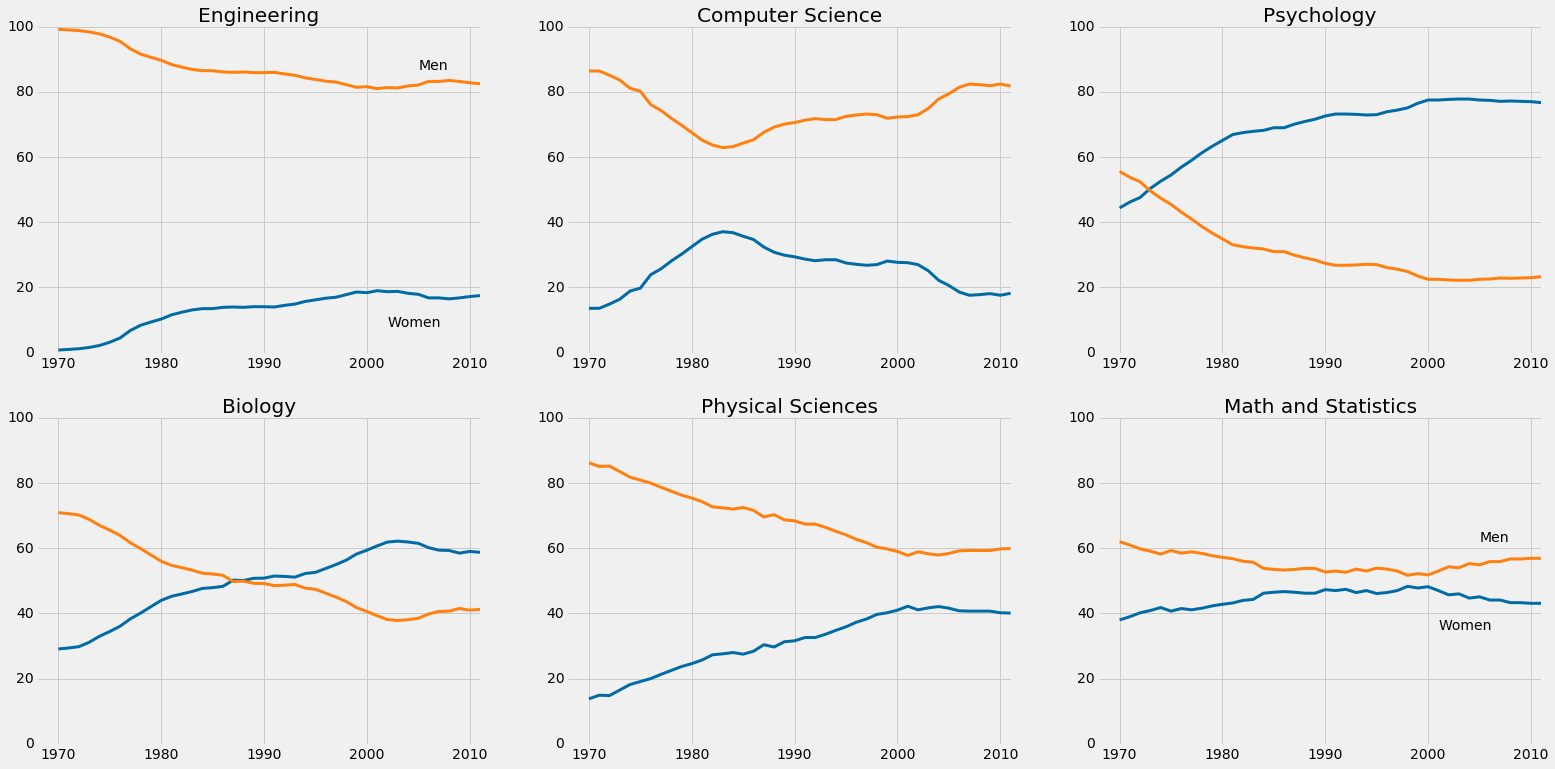

In [8]:
fig = plt.figure(figsize=(24, 12))

for sp in range(0,6):
    ax = fig.add_subplot(2,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
plt.show()